### Arahan Assignment
0. Gunakan dataset student score
1. Lakukan proses Exploratory data analysis
2. Lakukan feature engineering :
- Check Duplicated Data
- Check Missing Value Handling
- Outlier Analysis
3. Lakukan modelling machine learning regression : gunakan minimal 2 model (linear regression, decision tree regressor, atau random forest regressor)
4. Lakukan evaluasi model
5. Berikan kesimpulan model mana yang terbaik performanya

# **Import Libraries and Load Dataset**

In [ ]:
# Import libraries and resources
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('student_scores.csv')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# **Exploratory data analysis (EDA)**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **Feature engineering**

In [ ]:
print("Data Sebelum Pemeriksaan:")
print(dataset.shape)

Data Sebelum Pemeriksaan:
(25, 2)


In [ ]:
# Check Duplicate Data
dataset.duplicated().sum()

0

In [ ]:
# Check Missing value
dataset.isnull().sum()

,0
Hours,0
Scores,0


In [ ]:
print("Data Setelah Pemeriksaan Duplikat:")
print(dataset.shape)

Data Setelah Pemeriksaan Duplikat:
(25, 2)


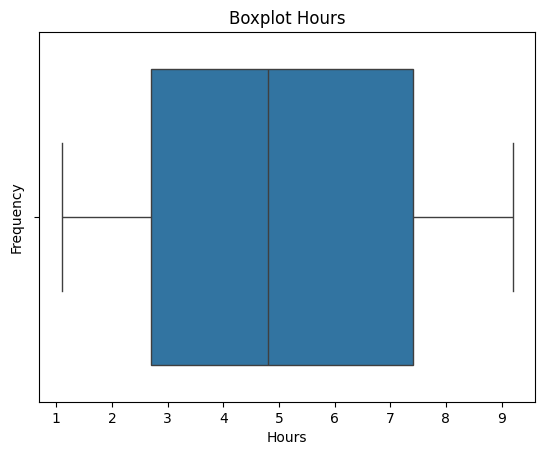

In [ ]:
# Handling Outlier Analysis

# Outlier Analysis
sns.boxplot(x="Hours", data=dataset)

# add label
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.title("Boxplot Hours")

# show plot
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

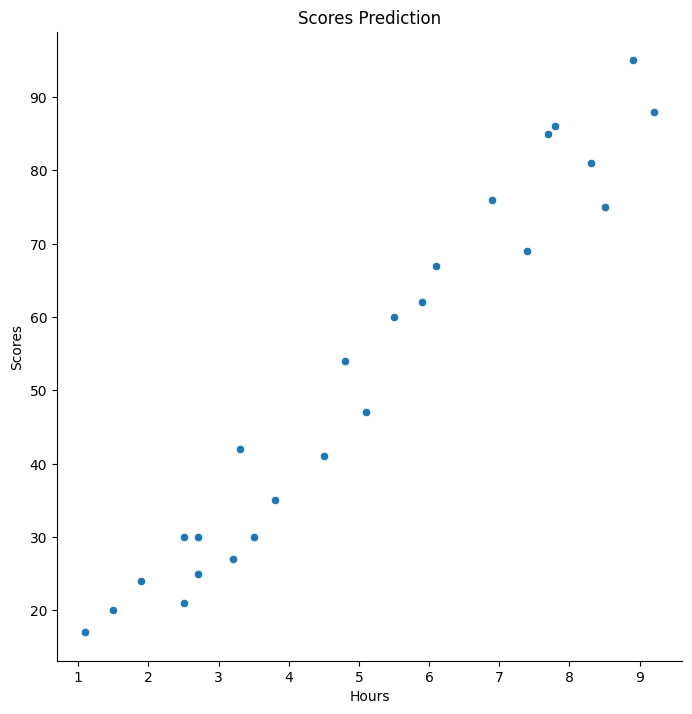

In [ ]:
plt.figure(figsize=(12,6))
sns.pairplot(dataset,x_vars=['Hours'],y_vars=['Scores'],size=7,kind='scatter')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores Prediction')
plt.show()

# **Modelling**

## Splitting Data

In [ ]:
# Hours
X = dataset['Hours']
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
# Scores
y = dataset['Scores']
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [ ]:
from sklearn.model_selection import train_test_split

#split data for train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=42)

In [ ]:
X_train

,Hours
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5
20,2.7
17,1.9


In [ ]:
X_test

,Hours
8,8.3
16,2.5
0,2.5
23,6.9
11,5.9
9,2.7
13,3.3


## **Linear Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import numpy as np
# Convert X_train and X_test to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

# Add new axis to the end
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [ ]:
#array
X_train

array([[5.1],
       [3.8],
       [1.5],
       [3.2],
       [4.5],
       [8.9],
       [8.5],
       [3.5],
       [2.7],
       [1.9],
       [4.8],
       [6.1],
       [7.8],
       [5.5],
       [7.7],
       [1.1],
       [7.4],
       [9.2]])

In [ ]:
#array
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
# Fitting the model using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_train = lr_model.predict(X_train)
y_pred_train

array([52.02223727, 39.39391742, 17.05150538, 33.56546211, 46.19378196,
       88.93578761, 85.05015073, 36.47968977, 28.70841601, 20.93714226,
       49.10800962, 61.73632947, 78.25028619, 55.90787415, 77.27887697,
       13.1658685 , 74.36464932, 91.85001526])

In [ ]:
y_train

,Scores
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30
20,30
17,24


In [ ]:
# Predicting
y_pred = lr_model.predict(X_test)

In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

In [ ]:
y_pred

array([83.10733229, 26.76559757, 26.76559757, 69.50760322, 59.79351103,
       28.70841601, 34.53687133])

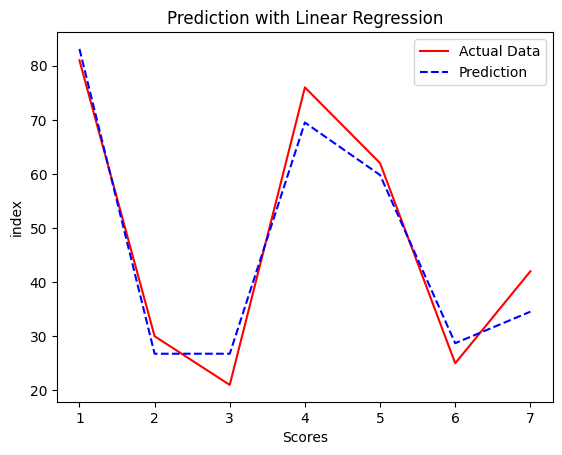

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Linear Regression')
plt.legend()
plt.show()

In [ ]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

In [ ]:
print('r square Linear Regression:',rsq)

r square Linear Regression: 0.9553509219739938


In [ ]:
# Intecept and coeff of the line
print('Intercept of the Linear Regression model:',lr_model.intercept_)
print('Coefficient of the line Linear Regression:',lr_model.coef_)

Intercept of the Linear Regression model: 2.4803670915057623
Coefficient of the line Linear Regression: [9.71409219]


## **Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# Predicting
y_pred_dt = dt_model.predict(X_test)

In [ ]:
y_pred_dt

array([75., 30., 30., 69., 67., 30., 27.])

In [ ]:
y_test

,Scores
8,81
16,30
0,21
23,76
11,62
9,25
13,42


In [ ]:
X_test

array([[8.3],
       [2.5],
       [2.5],
       [6.9],
       [5.9],
       [2.7],
       [3.3]])

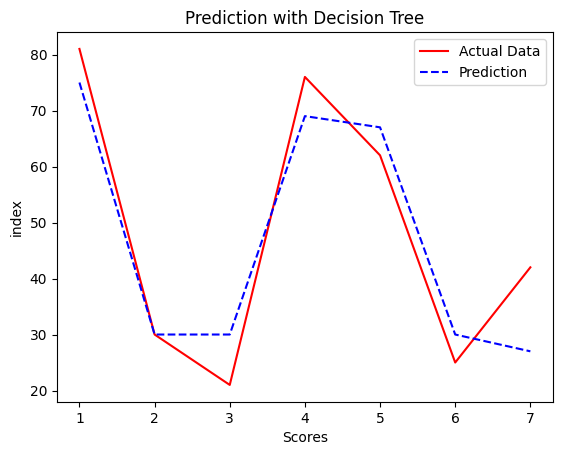

In [ ]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-',label='Actual Data')
plt.plot(c,y_pred_dt,color='b',linestyle='dashed',label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Decision Tree')
plt.legend()
plt.show()

In [ ]:
# Calculate R square vale
rsq_dt = r2_score(y_test,y_pred_dt)

In [ ]:
print('r square Decision Tree Results:',rsq_dt)

r square Decision Tree Results: 0.8803859268443893


## **Random Forest Model**

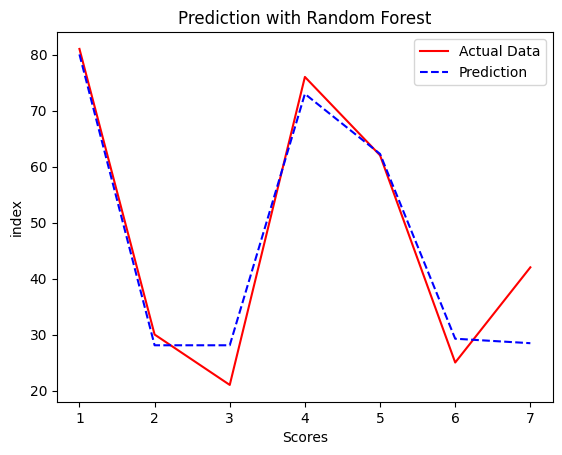

r square Random Forest Results: 0.9279381897086175


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# ## **Random Forest Model**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Predicting
y_pred_rf = rf_model.predict(X_test)

# Plotting the actual and predicted values
c = [i for i in range(1, len(y_test) + 1, 1)]
plt.plot(c, y_test, color='r', linestyle='-', label='Actual Data')
plt.plot(c, y_pred_rf, color='b', linestyle='dashed', label='Prediction')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction with Random Forest')
plt.legend()
plt.show()

# Calculate R square value
rsq_rf = r2_score(y_test, y_pred_rf)
print('r square Random Forest Results:', rsq_rf)


# **Evaluation**



In [ ]:
# Model Evaluation Comparison
print("\nModel Performance Comparison:")
print(f"Linear Regression R-squared: {rsq}")
print(f"Decision Tree R-squared: {rsq_dt}")
print(f"Random Forest R-squared: {rsq_rf}")


Model Performance Comparison:
Linear Regression R-squared: 0.9553509219739938
Decision Tree R-squared: 0.8803859268443893
Random Forest R-squared: 0.9279381897086175


# **Conclusion**

**Dari evaluasi model di atas dapat disimpulkan bahwa model yang menunjukkan perfoma yang terbaik adalah model yang menggunakan Linear Regression, lalu yang kedua dengan Random Forest, dan yang terakhir Decision Tree.**